In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
data.set_index('country',inplace=True)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


All features are numeric so there is no need for encoding.

In [5]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in the data.

In [6]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


We can see that there is high correlation between independent features like imports and exports, income and gdpp which results in multicollinearity. .

##### Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc=StandardScaler()
scaled_data=sc.fit_transform(data)

##### Principal component analysis

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA()
pc=pca.fit_transform(scaled_data)

Creating dataframe with principal component values

In [11]:
colnames=[]
for i in range(1,10):
    colnames.append('pc{}'.format(i))

In [12]:
colnames

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9']

In [13]:
pc_data=pd.DataFrame(pc,columns=colnames)

In [14]:
pc_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


In [15]:
pc_data.corr().round(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
pc1,1.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
pc2,0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
pc3,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
pc4,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0
pc5,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0
pc6,0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0
pc7,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0
pc8,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0
pc9,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0


Muticollinearity issue has been resolved by principal component analysis.

In [16]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

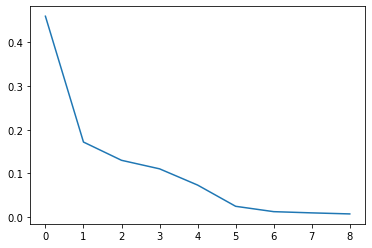

In [17]:
plt.plot(pca.explained_variance_ratio_)

By analysis of the above curve, it can be seen that the first 5 principal components provide most of the information contained in the data. So we proceed with clustering using only the first 5 principal components.

##### K Means clustering

In [18]:
x=pc_data[0:5]

In [19]:
from sklearn.cluster import KMeans

To find optimum number of clusters, we use silhouette score analysis

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
s_score=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters=i).fit(pc_data)
    s_score.append([i, silhouette_score(pc_data, kmeans.labels_)])

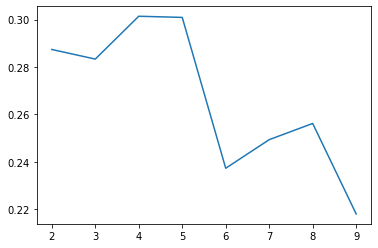

In [22]:
plt.plot(pd.DataFrame(s_score)[0],pd.DataFrame(s_score)[1])

Silhouette score is maximum when number of clusters is 4.

In [23]:
kmeans_model=KMeans(n_clusters=4,max_iter=5,random_state=123)

In [24]:
kmeans_model.fit(pc_data)

KMeans(max_iter=5, n_clusters=4, random_state=123)

In [25]:
labelled_data=pd.concat([pc_data, pd.Series(kmeans_model.labels_)], axis=1)
labelled_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,0
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148,2
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037,0
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339,2
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803,0
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735,0
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522,0
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049,2


In [26]:
labelled_data[0].value_counts()

0    87
2    46
1    31
3     3
Name: 0, dtype: int64

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

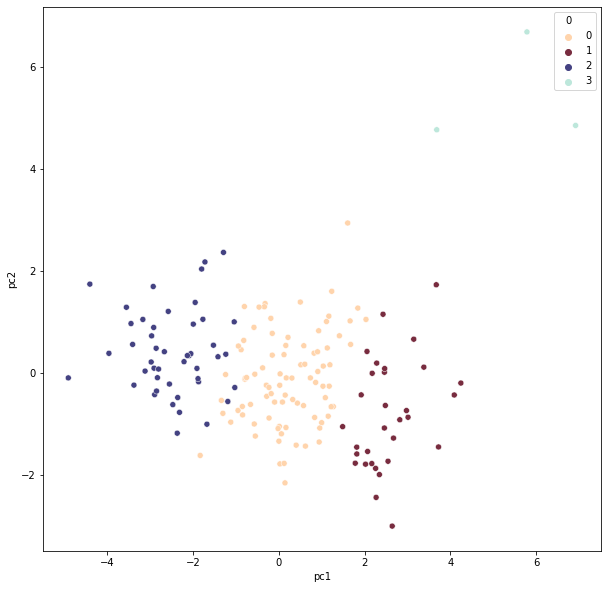

In [27]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='pc1',y='pc2',hue=0,legend='full',data=labelled_data,palette='icefire_r')

Adding cluster labels to the original data

In [28]:
data['Labels']=kmeans_model.labels_
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0


Average value of each feature for countries in different clusters.

In [29]:
data.groupby(['Labels','country']).mean()

child_mort  exports  health  imports   income  \
Labels country                                                              
0      Albania                    16.6     28.0    6.55     48.6   9930.0   
       Algeria                    27.3     38.4    4.17     31.4  12900.0   
       Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   
       Argentina                  14.5     18.9    8.10     16.0  18700.0   
       Armenia                    18.1     20.8    4.40     45.3   6700.0   
...                                ...      ...     ...      ...      ...   
2      Yemen                      56.3     30.0    5.18     34.4   4480.0   
       Zambia                     83.1     37.0    5.89     30.9   3280.0   
3      Luxembourg                  2.8    175.0    7.77    142.0  91700.0   
       Malta                       6.8    153.0    8.65    154.0  28300.0   
       Singapore                   2.8    200.0    3.96    174.0  72100.0   

                            inflation  life_expec  total_fer      gdpp  
Labels country                                                          
0      Albania                  4.490        76.3       1.65    4090.0  
       Algeria                 16.100        76.5       2.89    4460.0  
       Antigua and Barbuda      1.440        76.8       2.13   12200.0  
       Argentina               20.900        75.8       2.37   10300.0  
       Armenia                  7.770        73.3       1.69    3220.0  
...                               ...         ...        ...       ...  
2      Yemen                   23.600        67.5       4.67    1310.0  
       Zambia                  14.000        52.0       5.40    1460.0  
3      Luxembourg               3.620        81.3       1.63  105000.0  
       Malta                    3.830        80.3       1.36   21100.0  
       Singapore               -0.046        82.7       1.15   46600.0  

[167 rows x 9 columns]

In [30]:
data.groupby('Labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Labels,,,,,,,,,
0,21.954023,41.033207,6.240690,47.905355,12796.206897,7.532425,72.701149,2.302299,6764.505747
1,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
2,93.841304,28.837174,6.346957,42.128261,3738.978261,12.087065,59.232609,5.054348,1826.130435
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


Countries that fall under cluster label 2 are the most under-developed with high child mortality rate and very low gdp.

In [31]:
data[data['Labels']==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2


In [32]:
data[data['Labels']==2].shape[0]

46

There are 46 countries that fall under this category and are those in direst need of help.